<a href="https://colab.research.google.com/github/RahmaMostafaa/Airline_Delay_Cause_Deep_Learning/blob/main/Airline_delay_cause(Multi_classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from sklearn.metrics import classification_report ,confusion_matrix

In [ ]:
data=pd.read_csv('/content/Airline_Delay_Cause.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318017 entries, 0 to 318016
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 318017 non-null  int64  
 1   month                318017 non-null  int64  
 2   carrier              318013 non-null  object 
 3   carrier_name         318013 non-null  object 
 4   airport              318014 non-null  object 
 5   airport_name         318017 non-null  object 
 6   arr_flights          317524 non-null  float64
 7   arr_del15            317285 non-null  float64
 8   carrier_ct           317525 non-null  float64
 9   weather_ct           317523 non-null  float64
 10  nas_ct               317529 non-null  float64
 11  security_ct          317529 non-null  float64
 12  late_aircraft_ct     317529 non-null  float64
 13  arr_cancelled        317529 non-null  float64
 14  arr_diverted         317527 non-null  float64
 15  arr_delay        

In [ ]:
data.drop(['carrier_name','carrier','airport_name' ,'airport'],axis=1,inplace=True)

In [ ]:
data.dropna(inplace=True)

In [ ]:
data['weather_delay'].min(),data['weather_delay'].max()

(0.0, 57707.0)

In [ ]:
data.shape

(128054, 18)

In [ ]:
def weather_class(x):
  if x<= 30:
    return 0
  elif x<=100:
    return 1
  elif x<=300:
    return 2
  else:
    return 3

data['wdCase']=data['weather_delay'].apply(weather_class)
data['wdCase'].value_counts()

,count
wdCase,
0,164988
2,52535
1,50128
3,49617


In [ ]:
x=data.drop(['wdCase'],axis=1)
y=data['wdCase']

In [ ]:
y_cat= keras.utils.to_categorical(y) # for one hot encoding

In [ ]:
x

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,136.0,7.0,5.95,0.00,0.05,0.00,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,91.0,16.0,7.38,0.00,2.54,0.00,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.00,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,88.0,14.0,7.26,0.76,4.35,0.00,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,181.0,19.0,13.84,0.00,3.07,0.00,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128464,2014,8,97.0,30.0,12.45,0.00,8.26,0.00,9.29,0.0,1.0,1232.0,563.0,0.0,253.0,0.0,416.0
128465,2014,8,257.0,51.0,20.08,1.81,13.17,0.18,15.76,0.0,0.0,3176.0,1310.0,144.0,569.0,31.0,1122.0
128466,2014,8,248.0,91.0,17.61,4.44,46.65,0.00,22.31,0.0,1.0,5382.0,1027.0,484.0,2780.0,0.0,1091.0
128467,2014,8,124.0,26.0,9.31,0.00,5.37,0.00,11.32,2.0,0.0,1643.0,640.0,0.0,199.0,0.0,804.0


In [ ]:
y

,wdCase
0,0
1,0
2,0
3,1
4,0
...,...
128464,0
128465,2
128466,3
128467,0


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y_cat,test_size=0.2,random_state=42,shuffle=True)

print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (253814, 17)
x_test (63454, 17)
y_train (253814, 4)
y_test (63454, 4)


In [ ]:
keras_model = keras.models.Sequential([
    keras.layers.Dense(8, activation='tanh'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),

    keras.layers.Dense(4, activation='softmax')
])

In [ ]:
keras_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
history= keras_model.fit(
    x_train,y_train,
    validation_data=(x_test,y_test),
    epochs=100,
    batch_size=10000,
    verbose=1,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=6,
            restore_best_weights=True

            )
    ]
)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step - accuracy: 0.3934 - loss: 1.2651 - val_accuracy: 0.5360 - val_loss: 1.0653
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.5581 - loss: 1.0548 - val_accuracy: 0.5923 - val_loss: 1.0220
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5957 - loss: 1.0168 - val_accuracy: 0.5994 - val_loss: 0.9999
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6000 - loss: 0.9950 - val_accuracy: 0.5967 - val_loss: 0.9811
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5989 - loss: 0.9793 - val_accuracy: 0.5999 - val_loss: 0.9639
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.6028 - loss: 0.9568 - val_accuracy: 0.6041 - val_loss: 0.9408
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6079 - loss: 0.9362 - val_accuracy: 0.6117 - val_loss: 0.9242
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.6123 - loss: 0.9182 - val_accuracy: 0

In [ ]:
print(keras_model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,438 (115.00 KB)

 Trainable params: 9,812 (38.33 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,626 (76.67 KB)

None


In [ ]:
keras_model.save('keras_model.keras')

In [ ]:
newKerasMod= keras.models.load_model('keras_model.keras')

In [ ]:
y_pred = keras_model.predict(x_test)

1983/1983 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [ ]:
print('Prediction items are {}'.format(y_pred[:5]))

Prediction items are [[9.9847311e-01 1.5260080e-03 8.5292646e-07 7.9968870e-10]
 [9.9847311e-01 1.5260080e-03 8.5292646e-07 7.9968870e-10]
 [7.3396340e-03 9.8640382e-01 6.2558535e-03 7.4574405e-07]
 [9.9847311e-01 1.5260080e-03 8.5292646e-07 7.9968870e-10]
 [1.2489202e-05 5.7853726e-03 9.7917926e-01 1.5022882e-02]]


In [ ]:
model_loss, model_accuracy = keras_model.evaluate(x_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1983/1983 - 3s - 1ms/step - accuracy: 0.9900 - loss: 0.0445
Loss: 0.0444757342338562, Accuracy: 0.9900242686271667


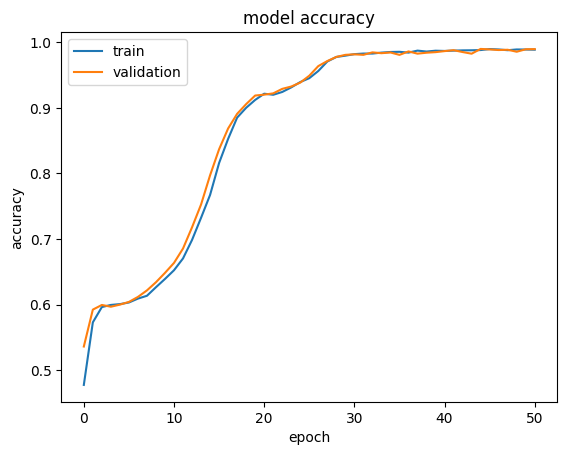

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


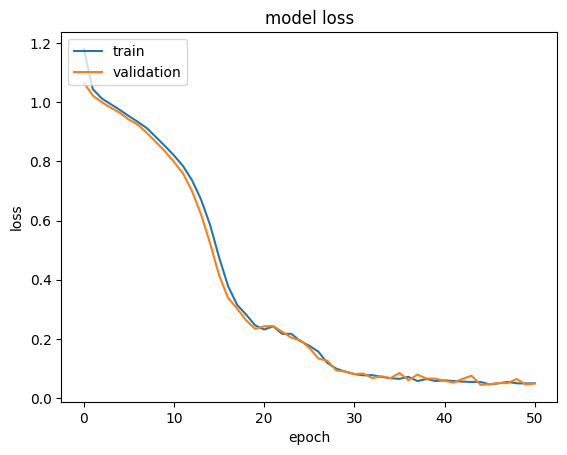

In [ ]:
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_pred # probability for each class

array([[9.9847311e-01, 1.5260080e-03, 8.5292646e-07, 7.9968870e-10],
       [9.9847311e-01, 1.5260080e-03, 8.5292646e-07, 7.9968870e-10],
       [7.3396340e-03, 9.8640382e-01, 6.2558535e-03, 7.4574405e-07],
       ...,
       [9.9847311e-01, 1.5260080e-03, 8.5292646e-07, 7.9968870e-10],
       [9.9847311e-01, 1.5260080e-03, 8.5292646e-07, 7.9968870e-10],
       [9.9847311e-01, 1.5260080e-03, 8.5292646e-07, 7.9968870e-10]],
      dtype=float32)

In [ ]:
new_y_pred=np.argmax(y_pred,axis=1)
new_y_test=np.argmax(y_test,axis=1)
print(new_y_pred)
print(new_y_test)

[0 0 1 ... 0 0 0]
[0 0 1 ... 0 0 0]


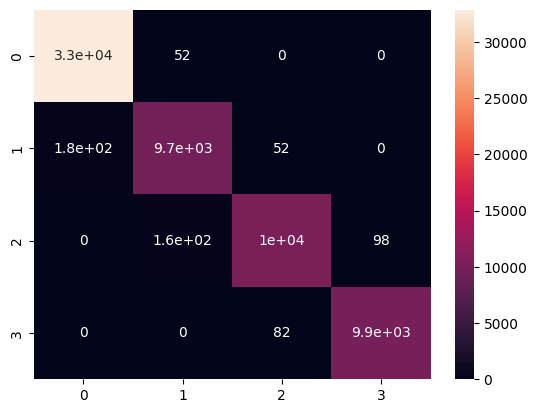

In [ ]:
sns.heatmap(confusion_matrix(new_y_test,new_y_pred),annot=True)
plt.show()

In [ ]:
class_report=classification_report(new_y_test,new_y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     32918
           1       0.98      0.98      0.98      9964
           2       0.99      0.98      0.98     10561
           3       0.99      0.99      0.99     10011

    accuracy                           0.99     63454
   macro avg       0.99      0.99      0.99     63454
weighted avg       0.99      0.99      0.99     63454

